<a href="https://colab.research.google.com/github/WittmannF/covid-projects/blob/master/Brazil_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Historical Data of Confirmed Cases per Country
This is a notebook for playing and exploring a dataset of confirmed cases over the last 3 months. In the end I brainstorm a way to compare the dates of two countries and put them side by side. 

The dataset comes from [COVID-19 Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) which is scrapped from [WHO's Situation Reports PDFs]() although there are [some divergences](https://github.com/CSSEGISandData/COVID-19/issues/985). 

In [0]:
# Imports
import pandas as pd
import numpy as np

In [0]:
# Parameters
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

In [0]:
# Read historical dataset with confirmed cases
df = pd.read_csv(URL)

In [0]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


Let's select some countries for further investigation

In [0]:
japan = df[df['Country/Region']=='Japan']

In [0]:
japan

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086


In [0]:
brazil = df[df['Country/Region']=='Brazil']

In [0]:
brazil

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1593


In [0]:
china = df[df['Country/Region']=='China']

In [0]:
china = china.groupby('Country/Region').sum()

In [0]:
china

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397


In [0]:
italy = df[df['Country/Region']=='Italy']

In [0]:
italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


Let's compare all of those countries using the same dates

In [0]:
countries = {'brazil': brazil,
             'japan': japan,
             'china': china,
             'italy': italy}

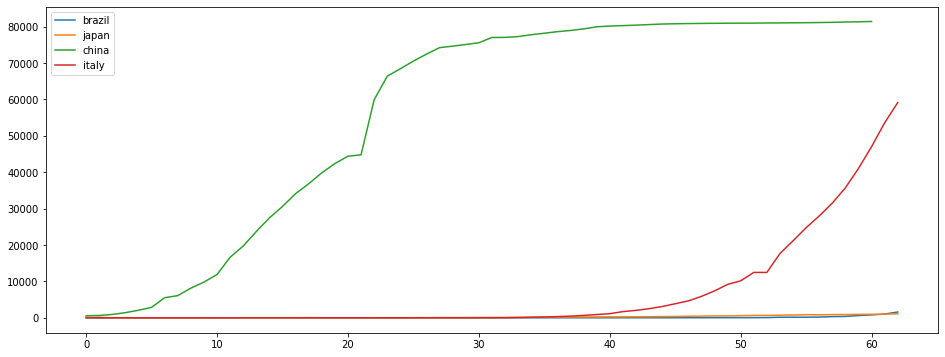

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for country, data in countries.items():
    plt.plot(data.values[0][2:], label=country)
plt.legend()

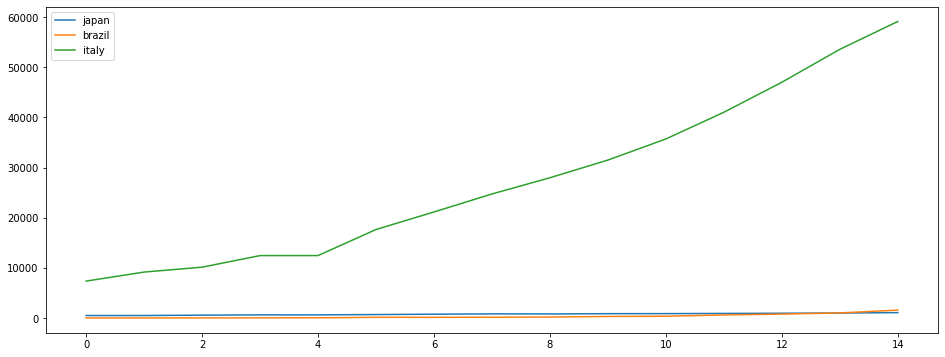

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.plot(japan.values[0][50:], label='japan')
plt.plot(brazil.values[0][50:], label='brazil')
plt.plot(italy.values[0][50:], label='italy')
plt.legend()

In [0]:
italy.values[0][50:]

array([7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506,
       35713, 41035, 47021, 53578, 59138], dtype=object)

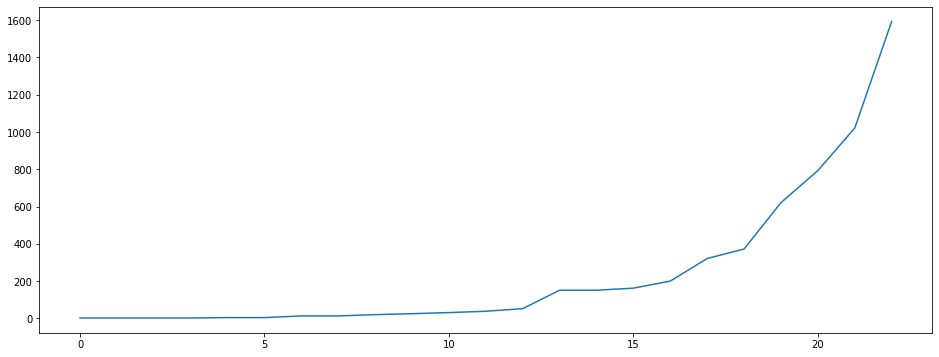

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(brazil.values[0][42:])

In [0]:
data = brazil.values[0][42:]

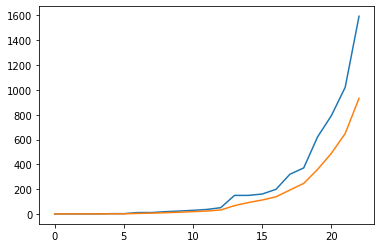

In [0]:
MOM = 0.7

rolling_mean = [data[0]]

for d in data[1:]:
    rolling_mean.append(rolling_mean[-1]*MOM + (1-MOM)*d)

plt.plot(data)
plt.plot(rolling_mean)

In [0]:
(rolling_mean[-1]-rolling_mean[-2]*MOM)/(1-MOM)

1593.0000000000002

In [0]:
rolling_mean[-1]

932.209695754721

In [0]:
rolling_mean[-2]

649.0138510781727

In [0]:
rolling_mean

[2,
 2.0,
 2.0,
 2.0,
 2.6,
 3.02,
 6.014,
 8.1098,
 11.676860000000001,
 15.673802000000002,
 20.2716614,
 25.590162980000002,
 33.513114086,
 68.7591798602,
 93.43142590214,
 114.00199813149801,
 139.80139869204862,
 194.16097908443405,
 247.51268535910384,
 359.55887975137273,
 489.59121582596094,
 649.0138510781727,
 932.209695754721]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

t = range(len(data))#np.linspace(0,4,50)
f = np.array(data)#func(x, 2.5, 1.3, 0.5)


In [0]:
log_f = np.array([np.log(d) for d in f])

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [0]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

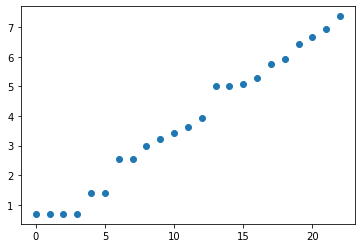

In [0]:
plt.scatter(t, log_f)

In [0]:
lr.fit(np.array(t).reshape(-1,1), log_f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lr.predict(np.array(t).reshape(-1,1))

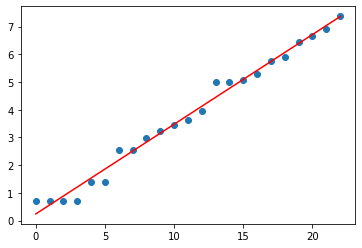

In [0]:
plt.scatter(t, log_f)
plt.plot(y_pred, 'r')

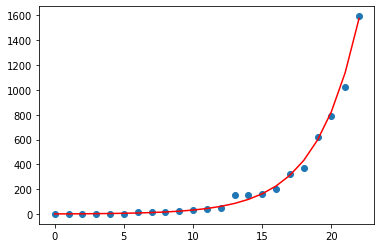

In [0]:
plt.scatter(t, f)
plt.plot(np.exp(y_pred), 'r')

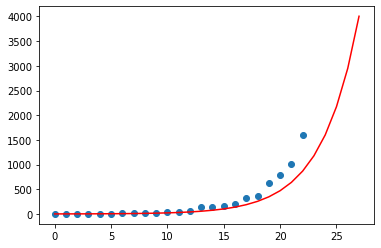

In [0]:
N_DAYS = 4 # Dias a serem projetados futuramente

y_pred = lr.predict(np.array(range(24+N_DAYS)).reshape(-1,1))
plt.scatter(t, f)
plt.plot(np.exp(y_pred), 'r')

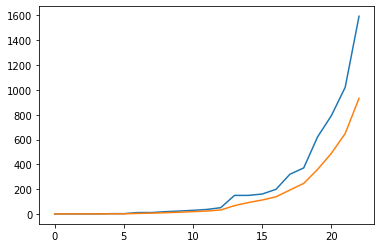

In [0]:
def generate_moving_average(data, mom=0.7):
    MOM = 0.7
    rolling_mean = [data[0]]

    for d in data[1:]:
        rolling_mean.append(rolling_mean[-1]*MOM + (1-MOM)*d)

    return np.array(rolling_mean)

f_mv = generate_moving_average(f)
plt.plot(f)
plt.plot(f_mv)

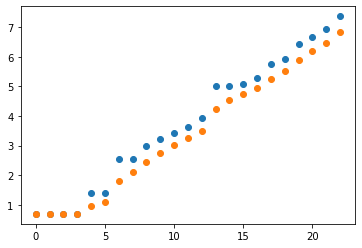

In [0]:
log_f_mv = np.log(f_mv)
plt.scatter(range(len(log_f)),log_f)
plt.scatter(range(len(log_f)), log_f_mv)

In [0]:
lr = LinearRegression()
lr.fit(np.array(range(len(log_f_mv))).reshape(-1,1), log_f_mv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

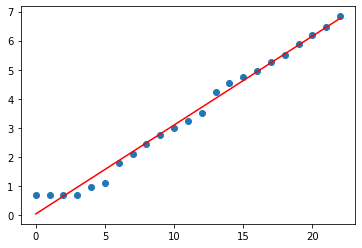

In [0]:
y_pred = lr.predict(np.array(t).reshape(-1,1))
plt.scatter(t, log_f_mv)
plt.plot(y_pred, 'r')

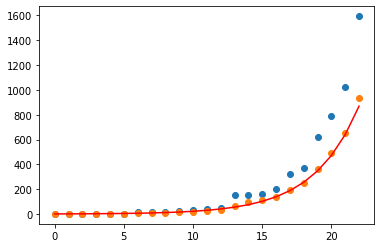

In [0]:
plt.scatter(t, f)
plt.scatter(t, f_mv)
plt.plot(np.exp(y_pred), 'r')

In [0]:
f_mv

array([  2.        ,   2.        ,   2.        ,   2.        ,
         2.6       ,   3.02      ,   6.014     ,   8.1098    ,
        11.67686   ,  15.673802  ,  20.2716614 ,  25.59016298,
        33.51311409,  68.75917986,  93.4314259 , 114.00199813,
       139.80139869, 194.16097908, 247.51268536, 359.55887975,
       489.59121583, 649.01385108, 932.20969575])

In [0]:
f_mv[1:]- f_mv[:-1]

array([  0.        ,   0.        ,   0.        ,   0.6       ,
         0.42      ,   2.994     ,   2.0958    ,   3.56706   ,
         3.996942  ,   4.5978594 ,   5.31850158,   7.92295111,
        35.24606577,  24.67224604,  20.57057223,  25.79940056,
        54.35958039,  53.35170627, 112.04619439, 130.03233607,
       159.42263525, 283.19584468])

In [0]:
list(zip(f[1:], [(rm-rm_*MOM)/(1-MOM) for rm, rm_ in zip(f_mv[1:], f_mv[:-1])]))

[(2, 2.0),
 (2, 2.0),
 (2, 2.0),
 (4, 4.0),
 (4, 4.0),
 (13, 13.0),
 (13, 13.0),
 (20, 20.000000000000004),
 (25, 25.000000000000004),
 (31, 30.999999999999993),
 (38, 38.00000000000001),
 (52, 52.0),
 (151, 151.00000000000003),
 (151, 151.0),
 (162, 162.0),
 (200, 200.00000000000003),
 (321, 321.0),
 (372, 372.0),
 (621, 621.0),
 (793, 793.0000000000001),
 (1021, 1021.0000000000001),
 (1593, 1593.0000000000002)]

In [0]:
f

array([2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200,
       321, 372, 621, 793, 1021, 1593], dtype=object)

In [0]:
mv_pred = np.exp(y_pred)

In [0]:
reversed_mv = [(rm-rm_*MOM)/(1-MOM) for rm, rm_ in zip(mv_pred[1:],mv_pred[:-1])]

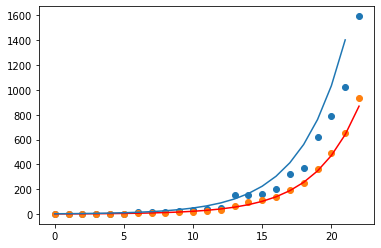

In [0]:
plt.scatter(t, f)
plt.scatter(t, f_mv)
plt.plot(np.exp(y_pred), 'r')
plt.plot(reversed_mv)

In [0]:
N_DAYS = 4 # Dias a serem projetados futuramente

y_pred = lr.predict(np.array(range(20+N_DAYS)).reshape(-1,1))


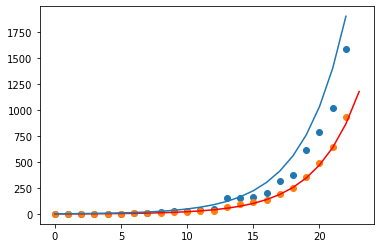

In [0]:
mv_pred = np.exp(y_pred)
reversed_mv = [(rm-rm_*MOM)/(1-MOM) for rm, rm_ in zip(mv_pred[1:],mv_pred[:-1])]
plt.scatter(t, f)
plt.scatter(t, f_mv)
plt.plot(np.exp(y_pred), 'r')
plt.plot(reversed_mv)

In [0]:
f

In [0]:
plt.figure()
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [0]:
brazil.T

### Which date of Italy is Brazil right now?
Before generalizing for any country, I am going to select two countries and compare both by hand. The way that I am going to re-scale the dates when comparing two countries is the following:
1. Select the max number of cases for the country that is behind. 
2. Use that value for filtering the cases for the countrie with the most cases.
3. Align their date axes

In [0]:
# Select only columns with dates
date_cols = df.columns[4:]; date_cols

In [0]:
brazil = brazil[date_cols].T

In [0]:
japan.columns=['Japan']; japan.head()

In [0]:
italy = italy[date_cols].T

In [0]:
italy.columns=['Italy']; italy.head()

Let's first try to compare both by hand

In [0]:
italy.plot()

In [0]:
japan.plot()

In [0]:
coutry_names = ['Japan', 'Italy']
idx_top = np.argmin([max(japan['Japan'].values), max(italy['Italy'].values)])

# Max number of cases to be filtered out from each
top_cases = min([max(japan['Japan'].values), max(italy['Italy'].values)])
print(f'{coutry_names[1-idx_top]} will be limited by the number of cases in {coutry_names[idx_top]} which is {top_cases}')

In [0]:
top_cases = int(top_cases*1.1) # Let's extrapolate a little 

In [0]:
italy = italy[italy.values<=top_cases]
italy.head()

In [0]:
japan = japan[japan.values<=top_cases]
japan.head()

In [0]:
italy.plot()

In [0]:
japan.plot()

Next, let's get the last N indexes from the country that has the most indexes

In [0]:
n_indexes = min(len(japan), len(italy))

In [0]:
japan_filt = japan.iloc[-n_indexes:]
italy_filt = italy.iloc[-n_indexes:]

In [0]:
plt.plot(japan_filt.values.T[0], label=coutry_names[0])
plt.plot(italy_filt.values.T[0], label=coutry_names[1])
plt.legend()

In [0]:
japan_filt=japan_filt.reset_index()
japan_filt.columns=['date_japan', 'Japan']
japan_filt.head()

In [0]:
italy_filt=italy_filt.reset_index()
italy_filt.columns=['date_italy', 'Italy']
italy_filt.head()

In [0]:
# Side by side
pd.concat([italy_filt[::-1], japan_filt[::-1]], axis=1)

In [0]:
len(japan_filt)

Some conclusions:

*   We can only compare countries if they have approximately the same slope, which is not the case here (i.e. japan's increase per day is way smaller than Italy)

For the future
*   Use rolling mean
*   Find countries with similar derivatives in order to be compared

